# Predicción de Serie de Tiempo empleando Regresión No Lineal

Esta tarea fue tomada del curso Aprendizaje de Máquinas Probabilístico de la Universidad de Chile, dictado por el profesor Felipe Tobar, en su edición Otoño 2018.

El archivo DatosT2.txt contiene la cantidad de pasajeros de una aerolínea medidos en forma mensual. 
Los datos son de la forma $\{{(x_i,y_i)}\}_{i=1}^N$  donde $x_i$ representa un mes e $y_i$ la cantidad de pasajeros transportados en el mes correspondiente. El  objetivo  de  esta  tarea  es  modelar  la  cantidad  de  pasajeros $y$  respecto  al  instante  de  tiempo  $x$. Para  este fin se asumir ́a el siguiente modelo: 

$y = f_\theta(x) + \eta$ (1)

Donde $\theta$ corresponde  a  los  parametros  de  la  función $f$ los  cuales se deben calibrar, y $\eta$ ∼ $N(0,\sigma_{\eta}^2)$ corresponde  a ruido gaussiano.
Para las partes que siguen considere 75% de los datos (los primeros 9 años) para entrenamiento de su modelo y el 25% restante para validar sus resultados.

# I: Visualización de datos

* En esta parte se cargan los datos y se visualizan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data = np.loadtxt('Datasets/DatosT2.txt')

In [3]:
x = data[:,0]
y = data[:,1]

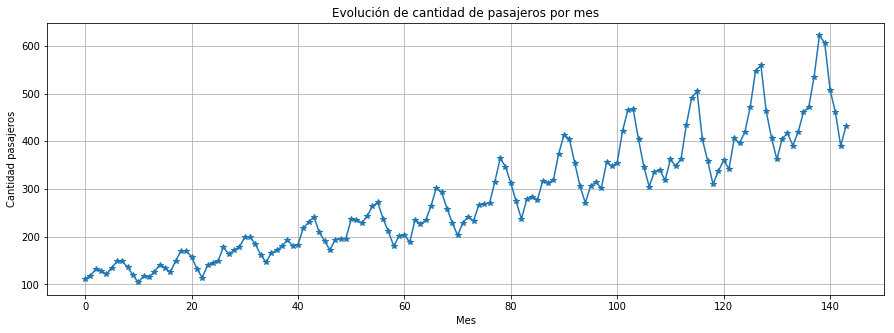

In [4]:
plt.figure(figsize=(15,5))
plt.plot(x,y,'*-')
plt.title('Evolución de cantidad de pasajeros por mes')
plt.ylabel('Cantidad pasajeros')
plt.xlabel('Mes')
plt.grid()
plt.show()

* Se observa que hay un crecimiento aproximadamente lineal (podría ser exponencial) mas una componente estacionaria (sinusoidal).

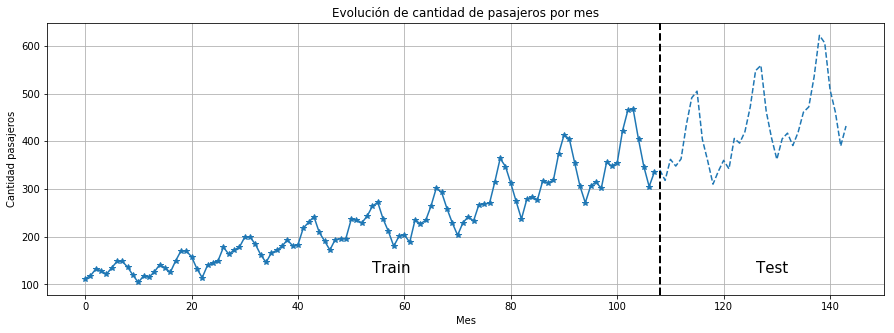

In [5]:
train_prc = .75

x_train = x[:math.floor(len(x)*train_prc)]
x_test =  x[math.floor(len(x)*train_prc):]

y_train = y[:math.floor(len(y)*train_prc)]
y_test = y[math.floor(len(y)*train_prc):]

plt.figure(figsize=(15,5))

plt.plot(x_train,y_train,'*-',c='#1f77b4')
plt.plot(x_test,y_test,'--',c='#1f77b4')
plt.axvline(len(x_train), color='k', linestyle='dashed', linewidth=2)
plt.text(len(x_train)/2 , 125, 'Train' , fontsize=15)
plt.text(len(x_train) + len(x_test)/2, 125, 'Test' , fontsize=15)

plt.title('Evolución de cantidad de pasajeros por mes')
plt.ylabel('Cantidad pasajeros')
plt.xlabel('Mes')
plt.grid()
plt.show()

* Si se separan el conjunto de entrenamiento y test se obtiene el gráfico anterior. Hay un salto en la línea que une el último dato que pertenece al conjunto de entrenamiento y el primero que pertenece al conjunto de test.

# II: Aproximación mediante polinomio

En esta parte se busca determinar la componente polinómica de la serie de tiempo. A priori se espera que no fuese mayor a un polinomio de grado 2. Para ello en la ecuación (1) se reemplaza $f_\theta(x)$ por $\Phi(x)\cdot\theta$. Al hacer el reemplazo se obtiene: 

$y = \Phi(x)\cdot\theta + \eta$, donde $\Phi(x)$ corresponde a la transformación no lineal del dominio. 

Se define la suma de los errores cuadráticos (SSE por sus siglas en inglés) más una componente regularizadora como el funcional a minimizar: 

$ J = \frac{1}{2}\sum_{i=1}^N(y_i - \Phi(x_i)\theta)^2 + \rho\parallel\theta\parallel^2$ (2)

Derivando (2) con respecto a $\theta$ e igualando a cero se obtiene que el $\theta$ que maximiza (2) es: 

$\theta = (\Phi(X)^T\Phi(X) + \rho \mathbb{I})^{-1}\Phi(X)^TY$ (3)

En ecuación (3) $\rho$ es el ponderador que regula la importancia entre ajuste y regularidad. Por otra parte $\mathbb{I}$ simboliza la matriz identidad. Es evidente de ecuación (3) que se necesitan datos $X$, una función $\Phi$, la variable respuesta $Y$.

Para esta aplicación $\Phi_i(x)$ = $x^i$ con $i \in 1,...,D$, siendo $D$ el grado del polinomio. Ahora el trabajo es encontrar el $D$, o dicho de otra forma, el grado del polinomio que minimiza $J$. Para ello con los datos del conjunto de entrenamiento (matriz $X$ de ecuación (3)) y para un $D$ dado se puede obtener $\theta$, empleando la ecuación (3). Habiendo calculado un $\theta$ se obtiene un modelo. Luego se debe escoger el modelo que tenga menor error en el conjunto de test. Para ello se evalua la SSE sobre el conjunto de test para cada $\theta$ y se selecciona el que sea mínimo.

In [6]:
#función que entrega la matriz Phi, el valor del funcional J y el vector de parámetros theta

def get_theta(X,Y,rho,grad):
    
    Phi = np.ones(len(X))
       
    for i in range(1,grad+1):
        col = np.power(X,i) #eleva a i
        Phi = np.vstack((Phi,col))#pégalo
    Phi = Phi.T
    
    if grad == 0:
        theta = np.linalg.inv(np.matmul(Phi.T,Phi) + rho*np.ones((grad+1,grad+1)))*np.matmul(Phi.T,Y)
        J = .5*np.power((Y - Phi*theta),2).sum() + rho*(np.linalg.norm(theta,2)**2)
    else:
        theta = np.matmul(np.linalg.inv(np.matmul(Phi.T,Phi) + rho*np.ones((grad+1,grad+1))),np.matmul(Phi.T,Y)) #ecuacion theta
        J = .5*np.power((Y - np.matmul(Phi,theta)),2).sum() + rho*(np.linalg.norm(theta,2)**2)
    return Phi,J,theta

Funcional J para i = 0: 391764.9398148148
SSE para i = 0: 1625932.7067901236


Funcional J para i = 1: 65637.82070952459
SSE para i = 1: 179625.44785407183


Funcional J para i = 2: 59953.17376289962
SSE para i = 2: 198947.05076134295


Funcional J para i = 3: 59884.439755216335
SSE para i = 3: 238560.4752712338


Funcional J para i = 4: 59852.56478853766
SSE para i = 4: 181977.78604938282




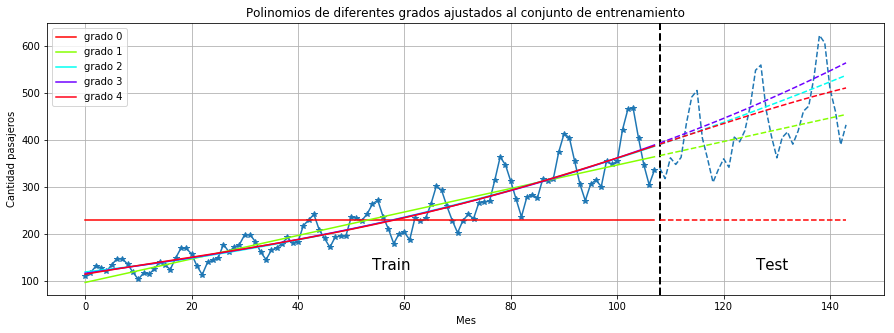

In [7]:
rho = 0
n_grados_max = 4   #numero de polinomios a considerar. el mayor será de grado 7

plt.figure(figsize=(15,5))
plt.plot(x_train,y_train,'*-',c='#1f77b4')
plt.plot(x_test,y_test,'--',c='#1f77b4')
plt.axvline(len(x_train), color='k', linestyle='dashed', linewidth=2)
plt.text(len(x_train)/2 , 125, 'Train' , fontsize=15)
plt.text(len(x_train) + len(x_test)/2, 125, 'Test' , fontsize=15)

cmap = plt.cm.get_cmap('hsv', n_grados_max+1)

for i in range(0,n_grados_max+1):
    Phi_train,J_train,theta_train =  get_theta(x_train,y_train,rho,i)
    Phi_test,_,_ =  get_theta(x_test,y_test,rho,i)
    print("Funcional J para i = " + str(i) +": " +str(J_train))
    if i == 0:
        y_i = theta_train*Phi_train
        y_i = y_i.T
        
        y_i_test = theta_train*Phi_test        
    else:
        y_i = np.matmul(Phi_train,theta_train)
        y_i_test = np.matmul(Phi_test,theta_train)
    
    SSE_i = np.power((y_i_test - y_test),2).sum()
    print('SSE para i = ' + str(i) +": " +str(SSE_i) +'\n')
    
    plt.plot(x_train,y_i,label = 'grado ' + str(i),c = cmap(i))
    plt.plot(x_test,y_i_test.T,c = cmap(i),linestyle='--')
    print()

plt.title('Polinomios de diferentes grados ajustados al conjunto de entrenamiento')
plt.xlabel('Mes')
plt.ylabel('Cantidad pasajeros')
plt.legend()
plt.grid()
plt.show()

Si bien al aumentar el grado del polinomio el modelo se adapta mejor a los datos de entrenamiento, no ocurre lo mismo sobre el conjunto de test, el cual permite medir el poder de generalización del modelo entrenado. Con lo anterior se considera que la componente polinomial de la serie de tiempo que es más probable que haya generado los datos es de grado 1, siendo ésta una recta. 

Considerando la imagen anterior queda claro que un polinomio no es suficiente para modelar la serie de tiempo. Para ello se pronote una componente sinusoidal modulada por una exponencial:

$f^{pol} = \theta_1sin(\theta_2x + \theta_3)e^{\theta_4x}$ (4)

Lo anterior ya que se nota que la serie de tiempo es dominada por una sinusoide cuya amplitud crece a medida que pasa el tiempo. $\theta_1$ es la amplitud, $\theta_2$ está vinculado con la frecuencia de la serie, $\theta_3$ el desfase de la sinusoide y $\theta_4$ al crecimiento de la amplitud de la sinusoide. 

Se buscan los parámetros que minimice el SSE. Dado que el modelo no es lineal en los parámetros no se puede derivar una expresión para éstos, a diferencia del polinomio con la ecuación (3). Para resolver los valores de $\theta$ se emplea el método BFGS de optimización, el cual es empleado para resolver problemas no lineares irrestrictos.

# III: Agregar componente sinusoidal

In [128]:
import scipy
from scipy import optimize

Phi_pol,_,theta_pol =  get_theta(x_train,y_train,rho,1)

def sse(theta):
    y_est = np.matmul(Phi_pol,theta_pol) + theta[0]*np.sin(theta[1]*x_train + theta[2])*np.exp(theta[3]*x_train)
    return np.power((y_train - y_est),2).sum()

x0 = [1,  0.5, 1,  0.01]  #condiciones iniciales
res1 = scipy.optimize.fmin_bfgs(sse, x0, gtol=1e-9)

print("\n")
print("Parámetros obtenidos por el optimizador: " + str(res1))

         Current function value: 47213.756999
         Iterations: 25
         Function evaluations: 367
         Gradient evaluations: 58


Parámetros obtenidos por el optimizador: [11.9779581   0.51867669 -1.04737396  0.01745431]


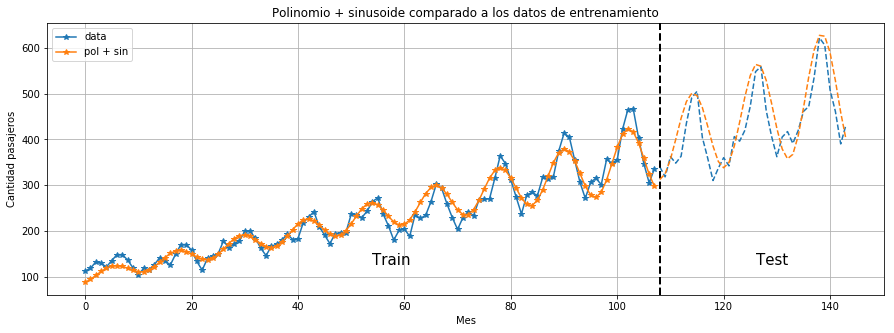

In [129]:
theta = res1
y_lin = np.matmul(Phi_pol,theta_pol)
y_sin = theta[0]*np.sin(theta[1]*x_train + theta[2])*np.exp(theta[3]*x_train)
y_tot = y_lin + y_sin


plt.figure(figsize=(15,5))
plt.plot(x_train,y_train,'*-',c='#1f77b4',label = 'data')
plt.plot(x_test,y_test,'--',c='#1f77b4')
plt.axvline(len(x_train), color='k', linestyle='dashed', linewidth=2)
plt.text(len(x_train)/2 , 125, 'Train' , fontsize=15)
plt.text(len(x_train) + len(x_test)/2, 125, 'Test' , fontsize=15)

plt.plot(x_train,y_tot,'*-',label = 'pol + sin',c='#ff7f0e')

y_lin_test = np.matmul(Phi_test,theta_train)
y_sin_test = theta[0]*np.sin(theta[1]*x_test + theta[2])*np.exp(theta[3]*x_test)
y_est_test = y_lin_test + y_sin_test
plt.plot(x_test,y_est_test,'--',c='#ff7f0e')


plt.title('Polinomio + sinusoide comparado a los datos de entrenamiento')
plt.xlabel('Mes')
plt.ylabel('Cantidad pasajeros')
plt.legend()
plt.grid()
plt.show()

In [102]:
print("SSE de pol + sinusoide: " + str(np.square(y_test - y_est_test).sum()))

SSE de pol + sinusoide: 84334.77176473585


* Ya se comienza a ver una mejor aproximación, sobre todo en el conjunto de Test. Sin embargo hay aún pequeñas fluctuaciones que no se han podido plasmar en el modelo propuesto. Se podría intentar calibrar otra componente con las características de la ecuación (4) y ver si logra mejorar la aproximación, tanto en conjunto de entrenamiento con en test. Esto es lo se hace en la siguiente parte de este ejercicio.

* Otra observación importante es que el SSE sobre el conjunto de test para el polinomio ajustado corresponde a 179625.45, mientras que al agregarle la componente sinusoidal este baja a menos de la mitad, a un valor de 84334, lo cual se considera una mejora sustancial.

* Una forma de sugerir un vector de condiciones iniciales para el optimizador es probar diferentes parámetros e ir visualizando como varían las curvas hasta que se logre algo similar a los datos. Esto es lo que se hizo mientras se elaboró este notebook. Además la periodicidad de los datos se puede derivar visualmente, al menos de manera estimativa. Por ejemplo se observa que la periodicidad está en torno a 10 meses, quizás un poco más. Si $2\pi$ se divide por este valor se obtiene un candidato $\theta_0$ inicial cercano a .6, el cual no está muy lejano al encontrado por el optimizador, de .52.

# IV: Agregar 2da componente sinusoidal

In [205]:
def sse2(theta2):
    
    y_est2 = y_lin + y_sin + theta2[0]*np.sin(theta2[1]*x_train + theta2[2])*np.exp(theta2[3]*x_train)
    return np.square(y_train - y_est2).sum()

x02 = [5,  1.05,  0,   0.01] #condiciones iniciales
res1 = scipy.optimize.fmin_bfgs(sse2, x02,gtol=1e-9)

print("\n")
print("Parámetros obtenidos por el optimizador: " + str(res1))

         Current function value: 25560.493107
         Iterations: 14
         Function evaluations: 175
         Gradient evaluations: 29


Parámetros obtenidos por el optimizador: [10.24466652  1.05406424  0.39242413  0.01066797]


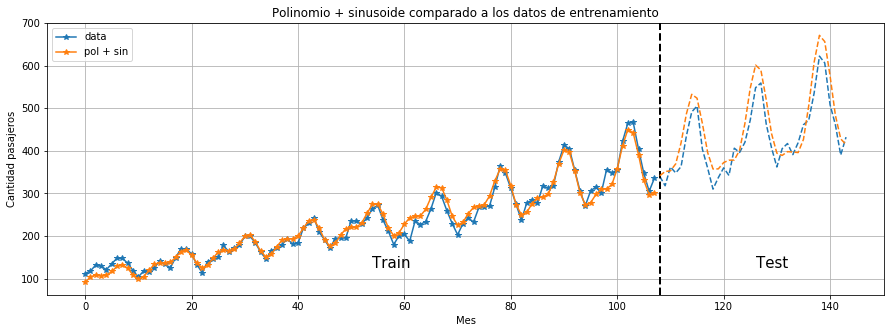

In [206]:
theta2 = res1#[10.24465333,  1.05406435,  0.39241611,   0.01066799]
y_sin2 = theta2[0]*np.sin(theta2[1]*x_train + theta2[2])*np.exp(theta2[3]*x_train)
y_tot2 = y_tot + y_sin2


plt.figure(figsize=(15,5))
plt.plot(x_train,y_train,'*-',c='#1f77b4',label = 'data')
plt.plot(x_test,y_test,'--',c='#1f77b4')
plt.axvline(len(x_train), color='k', linestyle='dashed', linewidth=2)
plt.text(len(x_train)/2 , 125, 'Train' , fontsize=15)
plt.text(len(x_train) + len(x_test)/2, 125, 'Test' , fontsize=15)

plt.plot(x_train,y_tot2,'*-',label = 'pol + sin',c='#ff7f0e')

y_sin2_test = theta2[0]*np.sin(theta2[1]*x_test + theta2[2])*np.exp(theta2[3]*x_test)
y_est2_test = y_lin_test + y_sin_test + y_sin2_test
plt.plot(x_test,y_est2_test,'--',c='#ff7f0e')

plt.title('Polinomio + sinusoide comparado a los datos de entrenamiento')
plt.xlabel('Mes')
plt.ylabel('Cantidad pasajeros')
plt.legend()
plt.grid()
plt.show()

In [198]:
print("SSE de pol + sinusoide 1 + sinusoide 2 : " + str(np.square(y_test - y_est2_test).sum()))

SSE de pol + sinusoide 1 + sinusoide 2 : 56642.89114210044


# V: Conclusión

* Se puede observar que al ir complejizando el modelo con sinusoides moduladas por exponenciales éstos se fueron ajustando mejor, lo cual queda reflejado en la reducción del SSE de 179625 luego de ajustar el polinomio lineal, a un 56643; siendo este último menor a 1/3 del valor inicial; esto sobre el conjunto de test.

* Por otro lado ocurre que el optimizador fmin_bfgs es muy sensible a las condiciones iniciales, por lo tanto se hace complicado emplearlo. Para obtener los resultados de la última figura fue necesario probar muchos valores. Una buena estrategia sería realizar búsqueda de grilla sobre los parámetros; primero una búsqueda gruesa y luego una más fina.